In [2]:
# matpltlib 库以及参数
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams.update({'axes.labelsize': 'large'})
matplotlib.rcParams.update({'xtick.labelsize': 'large'})
matplotlib.rcParams.update({'ytick.labelsize': 'large'})
matplotlib.rcParams.update({'legend.fontsize': 'large'})
matplotlib.rcParams.update({'errorbar.capsize': 3})

#其他的库
import numpy as np
import pandas as pd
import scipy as sp 
from scipy.optimize import leastsq
#封装进度条的函数
from tqdm import tqdm  

COLORLIST1=['#0404B4','#0000ff','#6E6E6E','#ff0000','#B40404']
COLORLIST2=['#0000ff','#0404B4','#000000','#B40404','#ff0000']
COLORLIST3=['#0052ad','#0074f5','#68aefc','#828282','#000000']
COLORLIST4=['#ff0000','#ff7474','#a9a9a9','#848484','#000000']
MARKERLIST=['o','v','x','^','s']


In [5]:
df=pd.read_csv('./DATA/redshift_bin_org.csv',index_col=[0,1])

In [4]:
df

SDSS_NAME          RA       DEC  REDSHIFT  \
red_bin_index org_index                                                       
0             0          222230.16+010231.4  335.625693  1.042081    0.2235   
              1          134826.86-005943.9  207.111950 -0.995528    0.2340   
              2          134459.44-001559.5  206.247690 -0.266537    0.2449   
              3          225757.22-002608.3  344.488429 -0.435656    0.2509   
              4          135908.00+002731.8  209.783356  0.458855    0.2570   
...                                     ...         ...       ...       ...   
51            5153       144407.63-010152.7  221.031804 -1.031321    4.5180   
              5154       233610.47-005814.8  354.043660 -0.970795    4.5211   
              5155       141914.18-015012.6  214.809118 -1.836846    4.5863   
              5156       222050.80+001959.1  335.211698  0.333103    4.7160   
              5157       000749.16+004119.6    1.954853  0.688786    4.8327   

                         g_SDSS  r_SDSS  i_SDSS      LOGBH  LOGEDD_RATIO  \
red_bin_index org_index                                                    
0             0          19.480  18.707  18.221   8.562371     -1.670831   
              1          19.600  18.677  18.105   8.468839     -1.452045   
              2          17.669  17.585  17.438   7.804190     -0.662985   
              3          18.951  18.656  18.411   8.305248     -1.562993   
              4          18.858  18.440  18.222   8.119494     -1.139233   
...                         ...     ...     ...        ...           ...   
51            5153       22.504  20.194  19.296   8.903947      0.447643   
              5154       22.930  20.830  19.945   9.851813     -1.093724   
              5155       23.063  20.140  19.073  10.409191     -1.177417   
              5156       23.962  21.722  20.119   9.646668     -0.637838   
              5157       24.895  21.502  20.060  10.046684     -1.104105   

                           LOGLBOL  ...      r_HSC      i_HSC  \
red_bin_index org_index             ...                         
0             0          44.991911  ...  18.737987  18.374371   
              1          45.117165  ...  19.244598  18.704962   
              2          45.241575  ...  18.283943  18.000725   
              3          44.842626  ...  18.745213  18.441834   
              4          45.080632  ...  18.566313  18.287029   
...                            ...  ...        ...        ...   
51            5153       47.451960  ...  19.956085  19.308536   
              5154       46.858459  ...  20.530994  19.759323   
              5155       47.332144  ...  19.938438  19.280464   
              5156       47.109201  ...  21.735556  20.580292   
              5157       47.042949  ...  21.931934  20.393879   

                                    hsc_id  g_SDSS-HSC  r_SDSS-HSC  \
red_bin_index org_index                                              
0             0          42644584253119735    0.240975   -0.030987   
              1          41192941141645641   -0.604891   -0.567598   
              2          41188010519184869   -0.851733   -0.698943   
              3          41602247229986243   -0.031300   -0.089213   
              4          42270595680863627    0.058298   -0.126313   
...                                    ...         ...         ...   
51            5153       41231969509481510    0.413973    0.237915   
              5154       41628072868342015    0.394741    0.299006   
              5155       40145531762140284    0.087036    0.201562   
              5156       42639344393019967   -0.131718   -0.013556   
              5157       41649655079001595   -0.273055   -0.429934   

                         i_SDSS-HSC           MBH  EDD_RATIO          LBOL  \
red_bin_index org_index                                                      
0             0           -0.153371  3.650659e+08   0.021339  9.815460e+44   
              1           

In [5]:
df_list=[]
for i in range(10):
    df_list.append(df.loc[5*i:5*(i+1)])

In [6]:
replace=df_list[0]
df_list[0]

SDSS_NAME          RA       DEC  REDSHIFT  \
red_bin_index org_index                                                       
0             0          222230.16+010231.4  335.625693  1.042081    0.2235   
              1          134826.86-005943.9  207.111950 -0.995528    0.2340   
              2          134459.44-001559.5  206.247690 -0.266537    0.2449   
              3          225757.22-002608.3  344.488429 -0.435656    0.2509   
              4          135908.00+002731.8  209.783356  0.458855    0.2570   
...                                     ...         ...       ...       ...   
5             595        023414.21-070857.6   38.559209 -7.149339    0.6611   
              596        232027.24-011023.7  350.113515 -1.173263    0.6615   
              597        100904.41+013457.6  152.268404  1.582688    0.6615   
              598        095105.40+004901.1  147.772500  0.816991    0.6618   
              599        100333.04+023904.4  150.887699  2.651227    0.6633   

                         g_SDSS  r_SDSS  i_SDSS     LOGBH  LOGEDD_RATIO  \
red_bin_index org_index                                                   
0             0          19.480  18.707  18.221  8.562371     -1.670831   
              1          19.600  18.677  18.105  8.468839     -1.452045   
              2          17.669  17.585  17.438  7.804190     -0.662985   
              3          18.951  18.656  18.411  8.305248     -1.562993   
              4          18.858  18.440  18.222  8.119494     -1.139233   
...                         ...     ...     ...       ...           ...   
5             595        19.204  19.149  19.068  8.279029     -0.687641   
              596        19.545  19.506  19.335  8.259981     -0.734044   
              597        19.102  19.146  19.058  9.072819     -1.556371   
              598        20.289  20.156  19.959  8.170139     -1.045718   
              599        20.487  20.491  20.274  8.941571     -1.783643   

                           LOGLBOL  ...      r_HSC      i_HSC  \
red_bin_index org_index             ...                         
0             0          44.991911  ...  18.737987  18.374371   
              1          45.117165  ...  19.244598  18.704962   
              2          45.241575  ...  18.283943  18.000725   
              3          44.842626  ...  18.745213  18.441834   
              4          45.080632  ...  18.566313  18.287029   
...                            ...  ...        ...        ...   
5             595        45.691759  ...  19.436018  19.219023   
              596        45.626307  ...  19.785131  19.553627   
              597        45.616819  ...  19.523886  19.260874   
              598        45.224792  ...  19.860342  19.619310   
              599        45.258298  ...  20.285358  20.252518   

                                    hsc_id  g_SDSS-HSC  r_SDSS-HSC  \
red_bin_index org_index                                              
0             0          42644584253119735    0.240975   -0.030987   
              1          41192941141645641   -0.604891   -0.567598   
              2          41188010519184869   -0.851733   -0.698943   
              3          41602247229986243   -0.031300   -0.089213   
              4          42270595680863627    0.058298   -0.126313   
...                                    ...         ...         ...   
5             595        36438511129211948   -0.267508   -0.287018   
              596        41614462116975266   -0.281431   -0.279131   
              597        43162570193917362   -0.135696   -0.377886   
              598        42085748878373156    0.237029    0.295658   
              599        43158193622252528    0.157015    0.205642   

                         i_SDSS-HSC           MBH  EDD_RATIO          LBOL  \
red_bin_index org_index                                                      
0             0           -0.153371  3.650659e+08   0.021339  9.815460e+44   
              1           -0.599962  2.

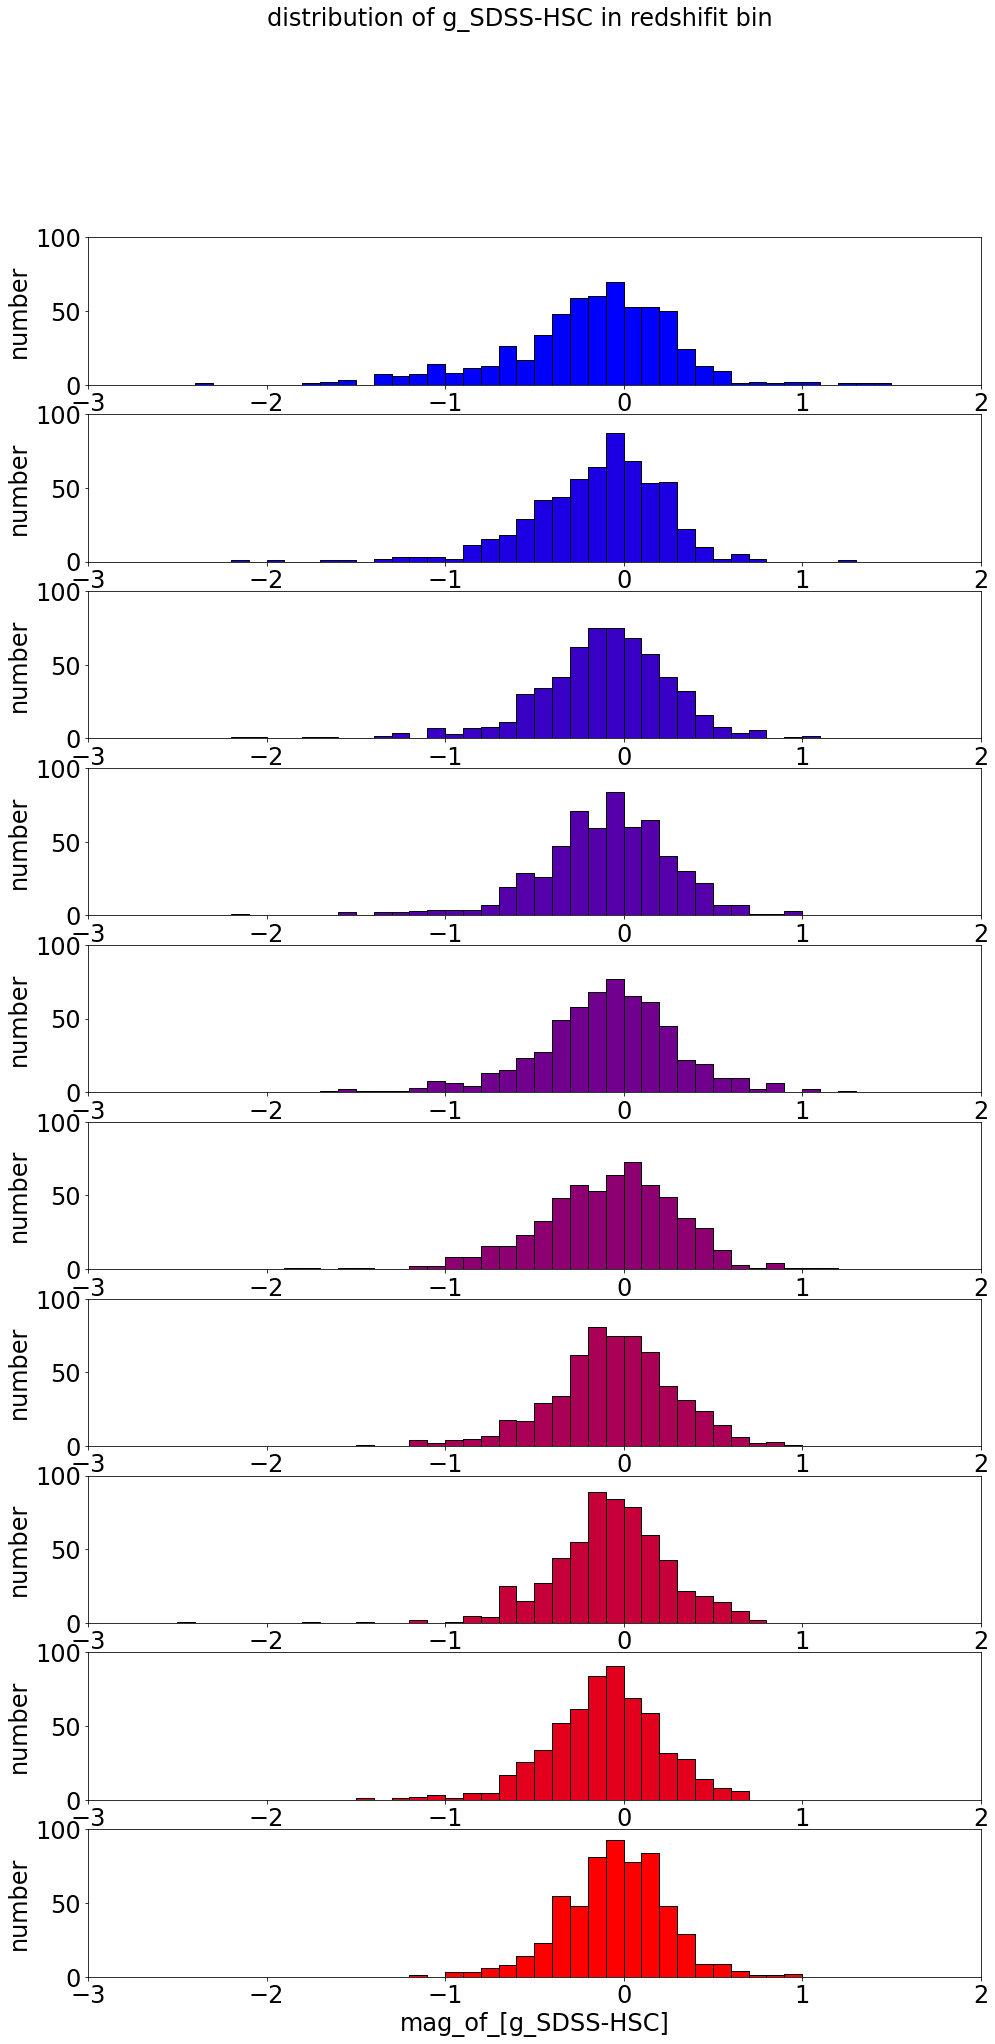

In [9]:
plt.figure(figsize=(16,32))
plt.suptitle('distribution of g_SDSS-HSC in redshifit bin')
for i in range(10):
    plt.subplot(10,1,i+1)
    plt.xlim(-3,2)
    plt.ylim(0,100)
    plt.xlabel('mag_of_[g_SDSS-HSC]')
    plt.ylabel('number')
    
    
    data=df_list[i]['g_SDSS-HSC']
    

    bins=np.arange(-3,2,0.1);
    plt.hist(data,bins,facecolor=((0+i*255/9)/255,0,(255-i*255/9)/255),edgecolor='black')


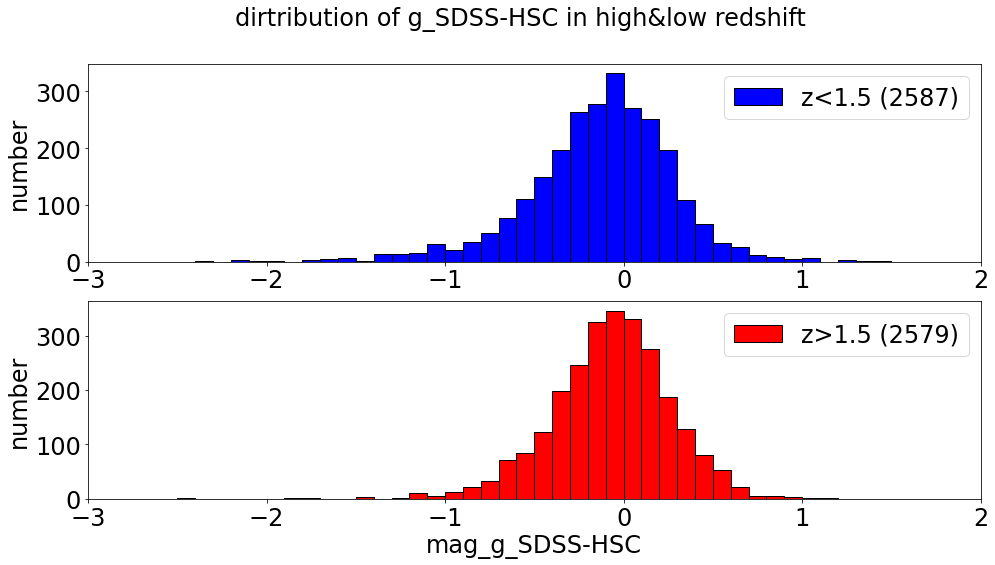

In [39]:
plt.figure(figsize=(16,8))
plt.suptitle('dirtribution of g_SDSS-HSC in high&low redshift')


plt.xlabel('mag_of_[g_SDSS-HSC]')
plt.ylabel('number')
########################################
plt.subplot(2,1,1)

plt.xlim(-3,2)
plt.ylabel('number')

bins=np.arange(-3,2,0.1);

data=df[df['REDSHIFT']<1.5]['g_SDSS-HSC'];
plt.hist(data,bins,facecolor='blue',edgecolor='black',label='z<1.5 (%d)'%len(data));
plt.legend()
#####################
plt.subplot(2,1,2)
plt.xlim(-3,2)
plt.ylabel('number')
plt.xlabel('mag_g_SDSS-HSC')
data=df[df['REDSHIFT']>1.5]['g_SDSS-HSC'];
plt.hist(data,bins,facecolor='red',edgecolor='black',label='z>1.5 (%d)'%len(data));
plt.legend()

plt.savefig('./FIGURES/3_1_1.pdf')